## Plot a single function 

In [ ]:
import math, sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.typing import NDArray
import time
from typing import Callable
from Project1 import *

np.random.seed(123)

plt.rcParams.update({
    "figure.figsize": (6,5),
    "axes.grid": False
})

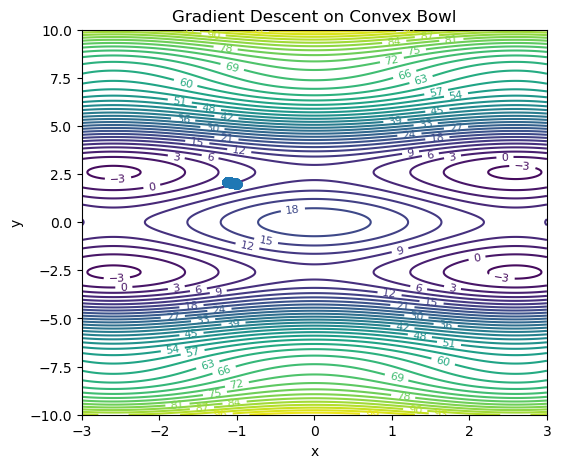

In [ ]:
class ConvexBowl(C2Differentiable):
    """Convex bowl function."""
    def forward(self, x):
        return x[0]**2 + x[1]**2
    def derivative(self, x):
        return np.array([2*x[0], 2*x[1]])
    def second_derivative(self, x):
        return np.array([[2, 0], [0, 2]])


class Rosenbrock(C2Differentiable):
    """Rosenbrock (banana valley) function.
    f(x,y) = (1-x)² + 100(y-x²)²
    """
    def forward(self, x):
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
    
    def derivative(self, x):
        df_dx = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
        df_dy = 200 * (x[1] - x[0]**2)
        return np.array([df_dx, df_dy])
    
    #! NOT SURE IF THIS IS CORRECT SECOND DERIVATIVE
    def second_derivative(self, x):
        d2f_dx2 = 2 - 400 * x[1] + 1200 * x[0]**2
        d2f_dy2 = 200
        d2f_dxdy = -400 * x[0]
        
        return np.array([[d2f_dx2, d2f_dxdy], 
                        [d2f_dxdy, d2f_dy2]])

class CosineBumps(C2Differentiable):
    """Multimodal cosine bumps.
    f(x,y) = x² + y² + 10cos(x) + 10cos(y)
    """
    def forward(self, x):
        return x[0]**2 + x[1]**2 + 10*np.cos(x[0]) + 10*np.cos(x[1])
    
    def derivative(self, x):
        df_dx = 2*x[0] - 10*np.sin(x[0])
        df_dy = 2*x[1] - 10*np.sin(x[1])
        return np.array([df_dx, df_dy])
    
    def second_derivative(self, x):
        d2f_dx2 = 2 - 10*np.cos(x[0])
        d2f_dy2 = 2 - 10*np.cos(x[1])
        d2f_dxdy = 0 
        
        return np.array([[d2f_dx2, d2f_dxdy], 
                        [d2f_dxdy, d2f_dy2]])



class GradientDescent:
    """Gradient Descent optimizer."""

    def __init__(self, f: C1Differentiable, x0, alpha=0.00001, tol=1e-6, max_iter=2000):
        super().__init__()

        self.f = f
        self.x = x0
        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter

    def optimize(self):
        self.f.clear_history()
        
        for _ in range(self.max_iter):
            grad = self.f.derivative(self.x)
            y = self.f.forward(self.x)

            new_x = self.x - self.alpha * grad
            self.f.add_history([self.x[0], self.x[1], y])
            
            if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
                break
            self.x = new_x

        return self.x


def plot_contours_with_path(
        f: C1Differentiable,
        optimizer,
        starting_point: tuple,
        xlim: tuple[int, int] = (-3, 3),
        ylim: tuple[int, int] = (-3, 3),
        levels: int = 80,
        title: str = ""
    ):
    xs = np.linspace(xlim[0], xlim[1], 400)
    ys = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(xs, ys)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f.forward((X[i, j], Y[i, j]))
    
    opt_instance = optimizer(f, np.array(starting_point))
    final_point = opt_instance.optimize()
    path = f.get_history()
    
    plt.figure()
    cs = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(cs, inline=1, fontsize=8)
    
    if len(path) > 0:
        P = np.asarray(path)
        plt.plot(P[:,0], P[:,1], marker='o', linewidth=1)
    
    plt.title(title)
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()


convex_bowl = ConvexBowl()
rosenbrock = Rosenbrock()
cosinebumps = CosineBumps()

plot_contours_with_path(
    f=cosinebumps,
    optimizer=GradientDescent,
    starting_point=(-1, 2),
    xlim=(-3, 3),
    ylim=(-10, 10),
    levels=40,
    title="Gradient Descent on Convex Bowl"
)


In [3]:
config = {
    "functions": {
        "convex_bowl": ConvexBowl()
    },
    "optimizers": ["GD"],  # Just GD first
    "starting_points": [(-2, 2)],  # Just one starting point
    "learning_rates": [0.01],  # Just one learning rate
    "plot_settings": {
        "xlim": (-3, 3),
        "ylim": (-3, 3), 
        "levels": 20
    }
}